Welcome to the [Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection). This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image.

> **Important**: This tutorial is to help you through the first step towards using [Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection) to build models. If you just just need an off the shelf model that does the job, see the [TFHub object detection example](https://colab.sandbox.google.com/github/tensorflow/hub/blob/master/examples/colab/object_detection.ipynb).

In [ ]:
!nvidia-smi

Mon Mar 21 15:41:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Setup

Important: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2.md). This notebook includes only what's necessary to run in Colab.

### Install

In [ ]:
!pip install -U --pre tensorflow=="2.*"
!pip install tf_slim

     |████████████████████████████████| 462 kB 5.2 MB/s 
     |████████████████████████████████| 352 kB 5.4 MB/s 


Make sure you have `pycocotools` installed

In [ ]:
!pip install pycocotools

Get `tensorflow/models` or `cd` to parent directory of the repository.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2


In [ ]:
!pwd

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2


In [ ]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Compile protobufs and install the object_detection package

Once the files are cloned from github to local drive go to below path & ensure proto & after convertion py files
/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/object_detection/protos

Updte path as models/research/object_detection/protos

In [ ]:
!pwd

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [ ]:
# Install the setup.py
%%bash 
cd /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/object_detection/packages/tf2
pip install .

Processing /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/object_detection/packages/tf2
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1206 sha256=456bf1367c19a8ac1a9f3553dc04dc9265886df773ea5d0eefc7d39b40470914
  Stored in directory: /tmp/pip-ephem-wheel-cache-otcgkjwv/wheels/51/f3/aa/10ba97aeb19f24f32368b16bbc0e767a4e5a96f4d863bf0470
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=9a95378f7cf76f96072772c0d86bd9aeef8d0b7a9193be6ea102f2befd5a9828
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=7d4859dae3b3aaa28c09ef38d80055f7faf1584b2e1fb939f5f381a52e3a7295
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Image preparation
#Create the image folder  or
# go to first version TFOD copy image C:\MachineLearning\iNeuron_DL\Object_Detection1_20022022\TFOD\models\research\images folder into research folder.

In [ ]:
#Covert xml to CSV for that # copy xml to csv.py  from TFOD local machine to research folder
%cd /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research
!python xml_to_csv.py

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research
Successfully converted xml to csv.
Successfully converted xml to csv.


In [ ]:
# Go to https://github.com/sourangshupal/Tensorflow2-Object-Detection-Tutorial
# Search utility section and download https://drive.google.com/file/d/1PBOgn5rlMx9tjjvfqlAJM8KY-8w05yXg/view
# Extarct the folder copy generate_tfrecord file and training folder into research folder

In [ ]:
# Create the TF Record
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=images/train.record

Successfully created the TFRecords: /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/images/train.record


In [ ]:
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=images/test.record

Successfully created the TFRecords: /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/images/test.record


In [ ]:
%cd /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research


In [ ]:
# Download model & modify the config
#https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz


--2022-03-20 13:47:40--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.76.128, 2a00:1450:400c:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.76.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M  68.5MB/s    in 3.5s    

2022-03-20 13:47:44 (66.3 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [ ]:
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
!pwd

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research


In [ ]:
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config  /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/training

In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62


Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install opencv-python-headless==4.5.2.52

     |████████████████████████████████| 38.2 MB 1.2 MB/s 


###  Configure the pipeline.config https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/2.2.0/training.html

In [ ]:
%cd /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research


In [ ]:
#Copy the /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/object_detection/model_main_tf2.py into Research folder & execute the Training command

!python model_main_tf2.py --model_dir=/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8  --pipeline_config_path=/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/training/pipeline.config

2022-03-21 02:20:40.106889: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0321 02:20:40.108763 140704454055808 cross_device_ops.py:1386] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0321 02:20:40.113407 140704454055808 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0321 02:20:40.120247 140704454055808 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0321 02:20:40.120460 140704454055808 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0321 02:20:40.149845 140704454055808 deprecation.py:343] From /content/dr

## Evalute

- After checking the accuracy we can interrupt using keyboard.
_ Here accuracy is 85%

In [ ]:
!python model_main_tf2.py --model_dir=--model_dir=/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 --pipeline_config_path=/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/training/pipeline.config --checkpoint_dir=/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8

Traceback (most recent call last):
  File "model_main_tf2.py", line 115, in <module>
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "model_main_tf2.py", line 90, in main
    wait_interval=300, timeout=FLAGS.eval_timeout)
  File "/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/object_detection/model_lib_v2.py", line 1137, in eval_continuously
    checkpoint_dir, timeout=timeout, min_interval_secs=wait_interval):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/checkpoint_utils.py", line 212, in checkpoints_iterator
    time.sleep(time_to_next_eval)
KeyboardInterrupt


## Convert Inference Graph

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/training/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 --output_directory /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/inference_graph


2022-03-21 13:53:17.349003: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0321 13:53:17.849052 140590827247488 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
2022-03-21 13:53:40.356735: W ten

### Imports

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

Import the object detection module.

In [ ]:
%cd /content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research

/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research


In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

Patches:

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing the path.

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

## Loader

In [ ]:
def load_model(model_name):
  # base_url = 'http://download.tensorflow.org/models/object_detection/'
  # model_file = model_name + '.tar.gz'
  # model_dir = tf.keras.utils.get_file(
  #   fname=model_name, 
  #   origin=base_url + model_file,
  #   untar=True)
  
  model_dir ="/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/inference_graph/saved_model"

  model = tf.saved_model.load(str(model_dir))

  return model

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [ ]:
# # List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/training/labelmap.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

For the sake of simplicity we will test on 2 images:

In [ ]:
!pip install pathlib

In [ ]:
# # If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('Test_image_card')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('Test_image_card/image1.jpg'),
 PosixPath('Test_image_card/image2.jpg')]

# Detection

Load an object detection model:

In [ ]:
model_name = "/content/drive/MyDrive/Ineuron_DeepLearning/Object_detection/tf2/models/research/inference_graph/saved_model/saved_model.pb"
detection_model = load_model(model_name)

Check the model's input signature, it expects a batch of 3-color images of type uint8:

In [ ]:
 print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>, <tf.Tensor 'unknown_9:0' shape=() dtype=resource>, <tf.Tensor 'unknown_10:0' shape=() dtype=resource>, <tf.Tensor 'unknown_11:0' shape=() dtype=resource>, <tf.Tensor 'unknown_12:0' shape=() dtype=resource>, <tf.Tensor 'unknown_13:0' shape=() dtype=resource>, <tf.Tensor 'unknown_14:0' shape=() dtype=resource>, <tf.Tensor 'unknown_15:0' shape=() dtype=resource>, <tf.Tensor 'unknown_16:0' shape=() dtype=resource>, <tf.Tenso

And returns several outputs:

In [ ]:
detection_model.signatures['serving_default'].output_dtypes

{'detection_anchor_indices': tf.float32,
 'detection_boxes': tf.float32,
 'detection_classes': tf.float32,
 'detection_multiclass_scores': tf.float32,
 'detection_scores': tf.float32,
 'num_detections': tf.float32,
 'raw_detection_boxes': tf.float32,
 'raw_detection_scores': tf.float32}

In [ ]:
detection_model.signatures['serving_default'].output_shapes

{'detection_anchor_indices': TensorShape([1, 100]),
 'detection_boxes': TensorShape([1, 100, 4]),
 'detection_classes': TensorShape([1, 100]),
 'detection_multiclass_scores': TensorShape([1, 100, 7]),
 'detection_scores': TensorShape([1, 100]),
 'num_detections': TensorShape([1]),
 'raw_detection_boxes': TensorShape([1, 51150, 4]),
 'raw_detection_scores': TensorShape([1, 51150, 7])}

Add a wrapper function to call the model, and cleanup the outputs:

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

Run it on each test image and show the results:

In [ ]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

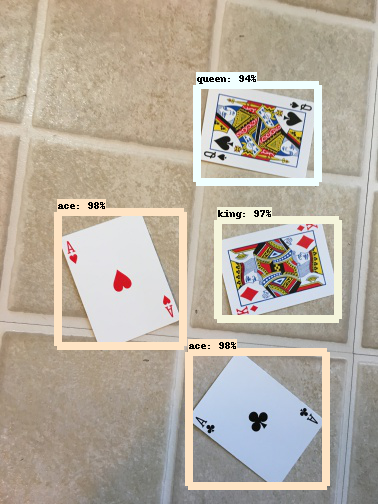

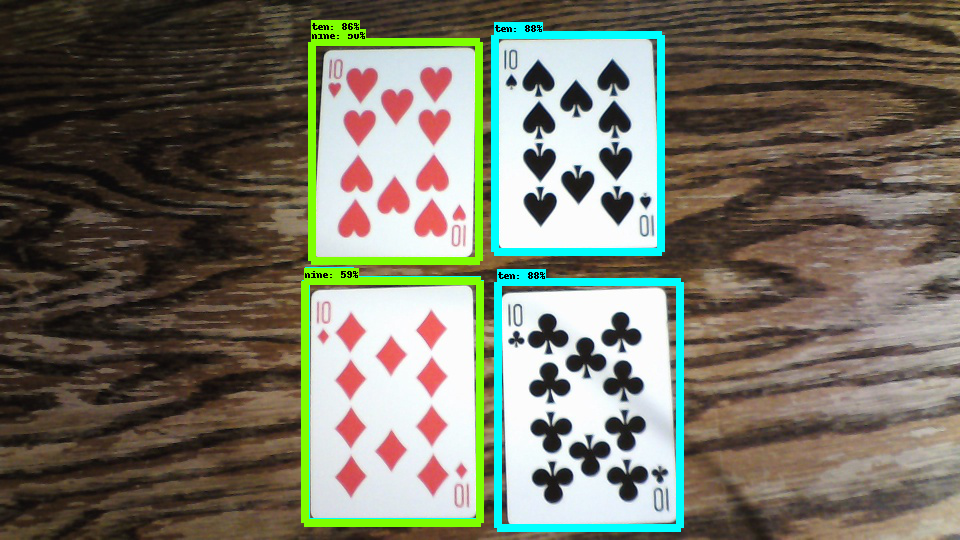

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)


## Instance Segmentation

In [ ]:
model_name = "mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28"
masking_model = load_model(model_name)

The instance segmentation model includes a `detection_masks` output:

In [ ]:
masking_model.output_shapes

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(masking_model, image_path)